In [8]:
import datetime
from pathlib import Path
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import serial

In [2]:
column_names = [
    'Time_s',
    'Temp_C',
]

df = pd.read_csv('data1.txt', sep=',', names=column_names)
df['delta_time_s'] = df['Time_s'] - df['Time_s'][0]
df.head()

,Time_s,Temp_C,delta_time_s
0,140.265,24.5469,0.000
1,140.988,24.5625,0.723
2,141.710,24.5156,1.445
3,142.431,24.5313,2.166
4,143.393,24.5703,3.128


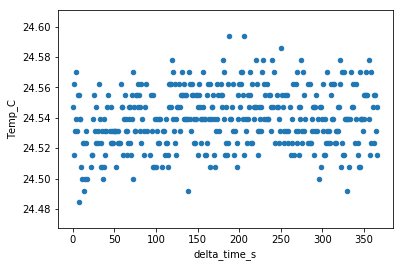

In [3]:
df.plot.scatter('delta_time_s', 'Temp_C')

In [4]:
df['diff_btwn_times'] = df['delta_time_s'].diff()
df.head()

,Time_s,Temp_C,delta_time_s,diff_btwn_times
0,140.265,24.5469,0.000,NaN
1,140.988,24.5625,0.723,0.723
2,141.710,24.5156,1.445,0.722
3,142.431,24.5313,2.166,0.721
4,143.393,24.5703,3.128,0.962


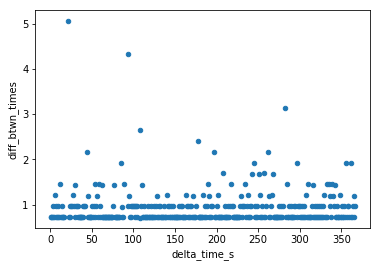

In [5]:
df.plot.scatter('delta_time_s', 'diff_btwn_times')

In [6]:
!ls /dev/tty.*

/dev/tty.Bluetooth-Incoming-Port /dev/tty.usbmodem14211


In [17]:
ucontroller = serial.Serial('/dev/tty.usbmodem14211', 115200)
time.sleep(0.25)
ucontroller.flushInput()
time.sleep(0.25)

max_counts = 10
counter = 0
lines = []
while True:
    if counter < max_counts:
        line = ucontroller.readline()
        print(counter, line, type(line), type(line.decode()), line.decode())
        lines.append( [counter, datetime.datetime.now(), line.decode().strip()])
        counter += 1
    else:
        break

for line in lines:
    print(line)
    
ucontroller.close()

0 b'3277.91,24.1797\r\n' <class 'bytes'> <class 'str'> 3277.91,24.1797

1 b'3278.63,24.2188\r\n' <class 'bytes'> <class 'str'> 3278.63,24.2188

2 b'3279.59,24.2109\r\n' <class 'bytes'> <class 'str'> 3279.59,24.2109

3 b'3280.31,24.1953\r\n' <class 'bytes'> <class 'str'> 3280.31,24.1953

4 b'3281.04,24.1953\r\n' <class 'bytes'> <class 'str'> 3281.04,24.1953

5 b'3281.76,24.1953\r\n' <class 'bytes'> <class 'str'> 3281.76,24.1953

6 b'3282.48,24.1953\r\n' <class 'bytes'> <class 'str'> 3282.48,24.1953

7 b'3283.2,24.1719\r\n' <class 'bytes'> <class 'str'> 3283.2,24.1719

8 b'3283.92,24.2031\r\n' <class 'bytes'> <class 'str'> 3283.92,24.2031

9 b'3284.89,24.1719\r\n' <class 'bytes'> <class 'str'> 3284.89,24.1719

[0, datetime.datetime(2019, 8, 1, 16, 45, 37, 549220), '3277.91,24.1797']
[1, datetime.datetime(2019, 8, 1, 16, 45, 38, 331020), '3278.63,24.2188']
[2, datetime.datetime(2019, 8, 1, 16, 45, 39, 54315), '3279.59,24.2109']
[3, datetime.datetime(2019, 8, 1, 16, 45, 39, 776563), '3280.

# Data set 2

In [13]:
mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")

column_names = [
    'DateTime',
    'Time_s',
    'Temp_C',
]

datafile = "data2.csv"

df2 = pd.read_csv(datafile, sep=',', names=column_names, 
                 parse_dates=['DateTime'], date_parser= mydateparser
                )
df2['DeltaTime_s'] = (df2['DateTime'] - df2['DateTime'][0])/np.timedelta64(1,'s')
df2['delta_time_s'] = df2['Time_s'] - df2['Time_s'][0]
df2['diff_btwn_times'] = df2['delta_time_s'].diff()
df2.head()

,DateTime,Time_s,Temp_C,DeltaTime_s,delta_time_s,diff_btwn_times
0,2019-08-01 16:51:11.993378,3611.85,24.0937,0.000000,0.00,NaN
1,2019-08-01 16:51:12.959921,3612.57,24.0937,0.966543,0.72,0.72
2,2019-08-01 16:51:13.681808,3613.53,24.0859,1.688430,1.68,0.96
3,2019-08-01 16:51:14.405152,3614.25,24.0937,2.411774,2.40,0.72
4,2019-08-01 16:51:15.127804,3614.98,24.0859,3.134426,3.13,0.73


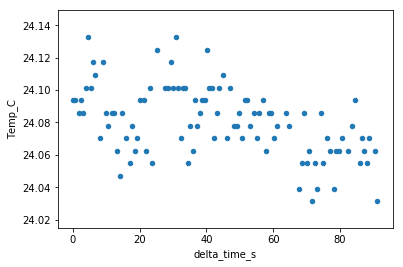

In [14]:
df2.plot.scatter('delta_time_s', 'Temp_C')

(0, 6)

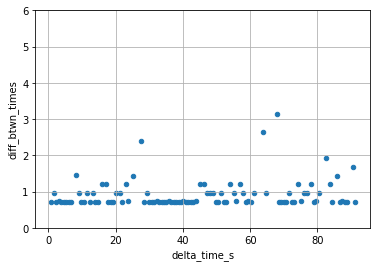

In [15]:
ax = df2.plot.scatter('delta_time_s', 'diff_btwn_times')
ax.grid()
ax.set_ylim(0, 6)

# Data set 3

2.2k pull-up resistors added to SDA and SCK microcontroller lines

In [11]:
max_counts = 1000

datafile = "data3.csv"
 
ucontroller = serial.Serial('/dev/tty.usbmodem14211', 115200)
time.sleep(0.25)
ucontroller.flushInput()
time.sleep(0.25)

counter = 0
while True:
    if counter < max_counts:
        line = ucontroller.readline()
        dt = datetime.datetime.now()
        line = line.decode().strip()
        data_string = f"{dt},{line}\n"
        with open(datafile, "a") as f:
            f.write(data_string)
        if counter % 10 == 0:
            print(counter, data_string)
        counter += 1
    else:
        break

ucontroller.close()


0 2019-08-01 17:10:08.972864,4746.53,24.1094

10 2019-08-01 17:10:16.928820,4754.46,24.1094

20 2019-08-01 17:10:28.499575,4766.02,24.125

30 2019-08-01 17:10:40.555802,4778.04,24.125

40 2019-08-01 17:10:49.476054,4786.95,24.1172

50 2019-08-01 17:10:59.845595,4796.57,24.1094

60 2019-08-01 17:11:09.731413,4805.47,24.0781

70 2019-08-01 17:11:16.960256,4814.37,24.0937

80 2019-08-01 17:11:28.050594,4825.44,24.125

90 2019-08-01 17:11:36.005552,4833.38,24.1016

100 2019-08-01 17:11:44.444346,4841.32,24.0937

110 2019-08-01 17:11:53.365772,4850.47,24.1016

120 2019-08-01 17:12:00.838753,4858.17,24.1172

130 2019-08-01 17:12:09.036057,4866.35,24.1016

140 2019-08-01 17:12:16.749143,4874.05,24.1016

150 2019-08-01 17:12:24.707212,4881.99,24.1016

160 2019-08-01 17:12:32.181198,4889.21,24.125

170 2019-08-01 17:12:41.105541,4898.35,24.1094

180 2019-08-01 17:12:49.063331,4906.05,24.1172

190 2019-08-01 17:12:56.296172,4913.51,24.0781

200 2019-08-01 17:13:04.011209,4921.21,24.1016

210 201

In [2]:
mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")

column_names = [
    'DateTime',
    'Time_s',
    'Temp_C',
]

datafile = "data3.csv"

df3 = pd.read_csv(datafile, sep=',', names=column_names, 
                 parse_dates=['DateTime'], date_parser= mydateparser
                )
df3['DeltaTime_s'] = (df3['DateTime'] - df3['DateTime'][0])/np.timedelta64(1,'s')
df3['delta_time_s'] = df3['Time_s'] - df3['Time_s'][0]
df3['diff_btwn_times'] = df3['delta_time_s'].diff()
df3.head()

,DateTime,Time_s,Temp_C,DeltaTime_s,delta_time_s,diff_btwn_times
0,2019-08-01 17:10:08.972864,4746.53,24.1094,0.000000,0.00,NaN
1,2019-08-01 17:10:09.695875,4747.25,24.1094,0.723011,0.72,0.72
2,2019-08-01 17:10:10.418979,4747.97,24.1484,1.446115,1.44,0.72
3,2019-08-01 17:10:11.143082,4748.69,24.1484,2.170218,2.16,0.72
4,2019-08-01 17:10:12.108340,4749.41,24.1641,3.135476,2.88,0.72


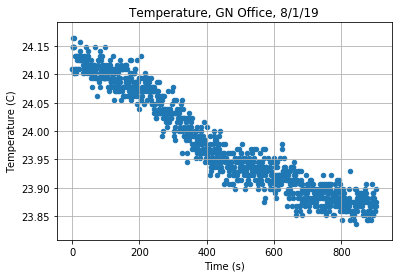

In [13]:
ax = df3.plot.scatter('delta_time_s', 'Temp_C')
ax.grid()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Temperature (C)")
ax.set_title("Temperature, GN Office, 8/1/19")
plt.savefig('data3_temp_vs_time.png')

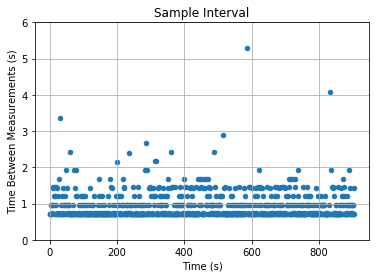

In [15]:
ax = df3.plot.scatter('delta_time_s', 'diff_btwn_times')
ax.grid()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Time Between Measurements (s)")
ax.set_ylim(0, 6)
ax.set_title("Sample Interval")
plt.savefig('data3_diffbetweentimes_vs_time.png')